<a href="https://colab.research.google.com/github/nabilazy/BK_DataScience/blob/main/BK_Hungarian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Bimbingan Karir Data Science

Nama : Nabila Zibriza Farsya

NIM : A11.2020.12530

Kelas : BKDS01

## 1) Pengumpulan Data


Sumber dataset yang digunakan: https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang digunakan adalah dataset "hungarian.data"

Deskripsi dataset terdapat di file "heart-disease.names"

Diharapkan membaca deskripsi dataset sebelum memakai dataset


Tahap pengumpulan data adalah tahap mendapatkan dataset yang siap dipakai atau membuat dataset sendiri dengan cara scrapping atau crawling.

Pada tugas ini, dataset didapatkan dari repository publik sesuai link di atas.

## 2) Menelaah Data

Import atau masukkan library yang dibutuhkan untuk menelaah data

In [411]:
import pandas as pd
import re
import numpy as np
import itertools

### Load Data

Upload dataset "hungarian data" ke file colab terlebih dahulu.

Simpan dataset yang akan digunakan dalam bentuk alamat penyimpanan ke dalam sebuah variabel.

In [412]:
dir = '/content/drive/MyDrive/heart+disease/hungarian.data'

buatlah iterasi untuk membaca dataset

In [413]:
# membuka file "hungarian.data" yang sudah disimpan di variabel dir
with open(dir, encoding='Latin1') as file:
  # membaca dan menghilangkan spasi/tab/newline dari setiap baris, lalu menyimpan nilai setiap baris ke dalam list lines
  lines = [line.strip() for line in file]

In [414]:
# menampilkan 10 baris pertama pada list lines
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

setelah membaca file dataset, lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [415]:
data = itertools.takewhile(lambda x: len(x) == 76,
                           (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
                           )

# lambda x: len(x) == 76 --> fungsi lambda untuk mengecek panjang tiap elemen adalah 76
# (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10)) --> menggabungkan setiap 10 baris/elemen dari list lines menjadi sebuah string yang dipisahkan dengan spasi.
# Lalu, dengan fungsi split, string tersebut diubah menjadi list
# Setiap elemen pada string hasil join yang dipisahkan dengan spasi akan menjadi elemen/string yang berdiri sendiri pada list hasil split()
# itertools.takewhile --> fungsi yang membuat iterator yang mengembalikan nilai dari iterable(generator expression) selama kondisi tertentu bernilai benar

In [416]:
# data_list = list(data)
# print(data_list)

In [417]:
# membuat dataframe
df = pd.DataFrame.from_records(data)

In [418]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


menampilkan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [420]:
# memilih semua baris dan kolom, kecuali kolom terakhir, kolom terakhir bernilai name
df = df.iloc[:,:-1]

In [421]:
# menghapus kolom pertama pada dataframe df, kolom pertama adalah id pasien
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [422]:
df = df.astype(float)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

## 3) Validasi Data

Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya.

Pada dataset, nilai null direpresentasikan dengan nilai -9.0. Nilai tersebut perlu diubah menjadi null value yang sebenarnya.

In [424]:
# mengganti -9.0 menjadi nilai null
df.replace(-9.0, np.nan, inplace=True)

menghitung jumlah nilai null di setiap atribut

In [425]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [426]:
# mengecek 5 baris pertama dataset untuk memastikan apakah representasi nilai null sudah sesuai
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## 4) Menentukan Object Data

memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [428]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [429]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [430]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang tertera pada deskripsi dataset

In [431]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [432]:
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-432-e9a4003b4301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


Cek apakah dataframe sudah sesuai dengan yang dibutuhkan

In [433]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur pada dataset

In [434]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

## 5) Membersihkan data

Untuk menghasilkan model yang lebih akurat, pembersihan data perlu untuk dilakukan

menghitung jumlah null values pada dataset yang digunakan

In [435]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan hasil penghitungan jumlah nilai null tiap fitur pada dataset di atas, terdapat 3 fitur yang datanya memiliki nilai null hampir 90%. Oleh karena itu, ketiga fitur tersebut harus dihapus menggunakan fungsi drop

In [436]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [437]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dari hasil di atas, masih terdapat beberapa fitur yang datanya memiliki nilai null. Karena persentase nilai null pada fitur tersebut hanya sedikit, nilai null dapat digantikan dengan nilai mean tiap fiturnya.

In [438]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [439]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanRestCG = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)

Membulatkan nilai mean

In [440]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanRestCG = round(meanRestCG.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())

Menggantikan nilai null pada tiap fitur dengan masing-masing nilai mean yang sudah dihitung di atas

In [441]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach': meanthalach, 'exang': meanexang, 'restecg': meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [442]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [443]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Mengecek data duplikat

In [444]:
duplicate_rows = dfClean.duplicated()

In [445]:
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
289    False
290    False
291    False
292    False
293    False
Length: 294, dtype: bool

In [446]:
# melihat baris data yang merupakan data duplikat
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [447]:
# menampilkan semua baris data yang merupakan data duplikat
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data duplikat

In [448]:
dfClean = dfClean.drop_duplicates()
print("'All Duplicates Rows:")
dfClean[dfClean.duplicated(keep=False)]

'All Duplicates Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [449]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [450]:
# menghitung banyak value untuk setiap nilai target
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Visualisasi data untuk mencari korelasi antar fitur

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

In [452]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

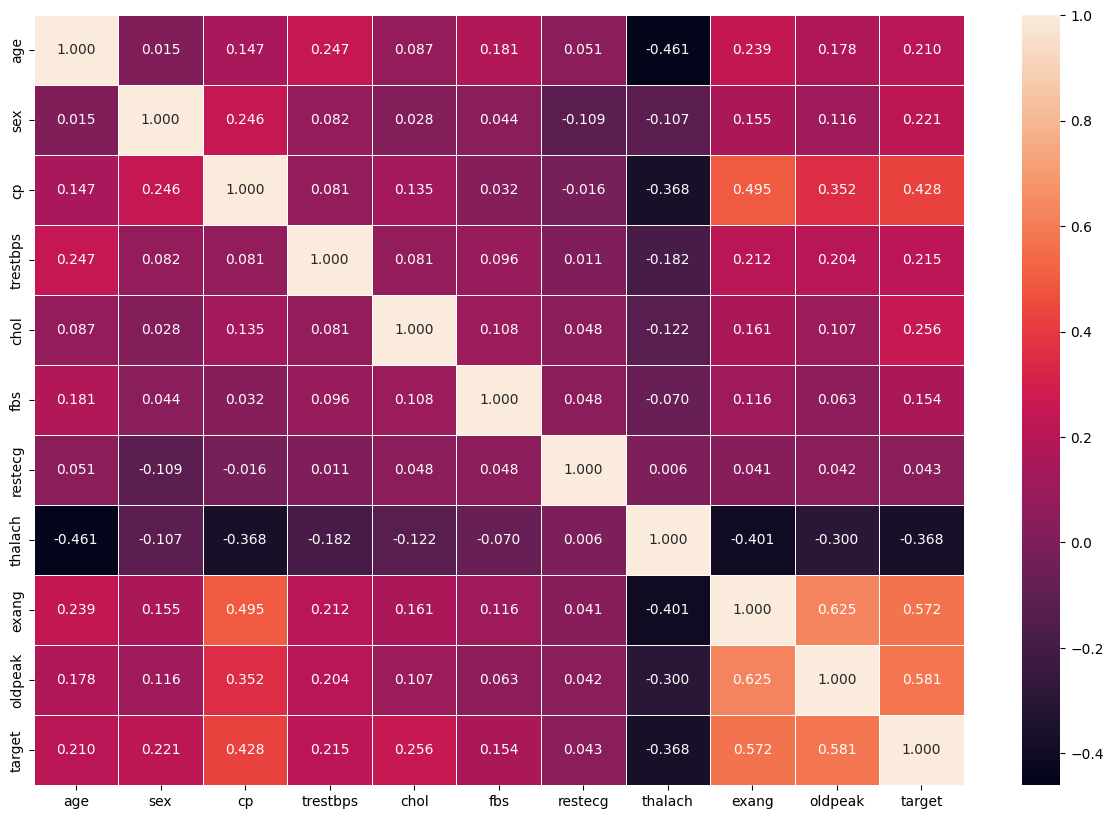

In [453]:
cor_mat = dfClean.corr()
fix,ag = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

## 6) Konstruksi Data

Tahap konstruksi data tujuannya adalah untuk menyesuaikan semua tipe data yang ada di dalam dataset. Pada kasus ini, dataset yang digunakan semua tipe datanya sudah sesuai sehingga tidak perlu dilakukan penyesuaian kembali.

In [454]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [455]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe dataset kita, kita harus memisahkan antara fitur dan target lalu simpan ke dalam variabel.

In [456]:
# X contains dataframe dfClean with 'target' column dropped; .values used to convert dataframe into numpy array
X = dfClean.drop("target", axis=1).values
# y is a dataframe which only contains of the values of the last column in dfClean
y = dfClean.iloc[:,-1]

In [457]:
X

array([[ 40.,   1.,   2., ..., 172.,   0.,   0.],
       [ 49.,   0.,   3., ..., 156.,   0.,   1.],
       [ 37.,   1.,   2., ...,  98.,   0.,   0.],
       ...,
       [ 48.,   1.,   3., ..., 138.,   0.,   0.],
       [ 47.,   0.,   2., ..., 135.,   0.,   1.],
       [ 53.,   1.,   4., ..., 148.,   0.,   0.]])

In [458]:
y.head()

0    0.0
1    1.0
2    0.0
3    3.0
4    0.0
Name: target, dtype: float64

Setelah fitur dan target dipisahkan, dilakukan pengecekan pada persebaran jumlah terget.

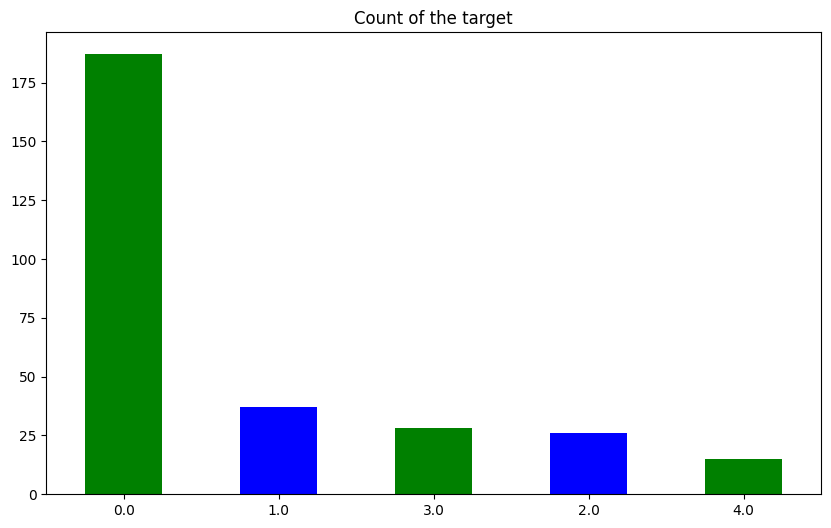

In [459]:
# Create bar graph which shows the counts of unique values for column 'target'
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

# .value_counts() --> to calculate the counts of unique values in 'target' column
# .plot(...) --> to create bar plot. Parameter: 'kind' --> specify what plot should be created
# 'figsize' --> set size of the figure; 'color' --> set colors of the plot, in this case bar plot
# plt.title --> set the title of the plot
# .xticks(rotation=0) --> rotation is used to control the rotation (posisi label x-axis) of x-axis labels.
# in this case rotation=0, it means no rotation happen and the x-axis labels are displayed horizontally (default)
# Rotating the labels can be a useful technique to improve readability.

Grafik di atas menunjukkan bahwa persebaran jumlah target tidak seimbang Oleh karena itu, fitur 'target' harus diseimbangkan dulu.

Terdapat 2 cara untuk menyeimbangkan target, yaitu oversampling dan undersampling.

Oversampling dilakukan jika jumlah dataset sedikit, sedangkan undersampling dilakukan jika jumlah data terlalu banyak.

Kali ini akan dilakukan oversampling karena jumlah data tidak banyak. Salah satu metode oversampling yang akan digunakan adalah SMOTE.

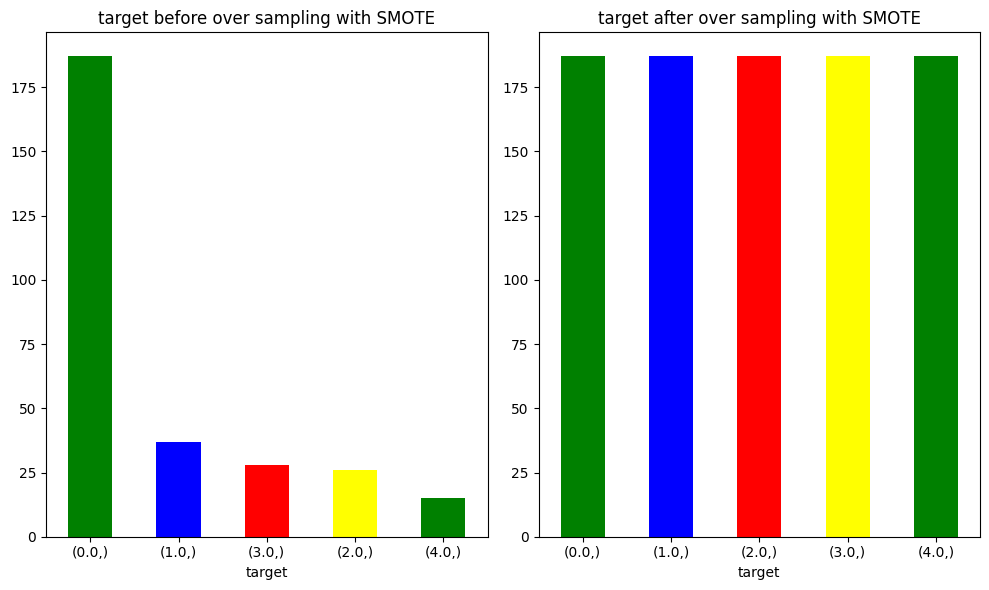

In [460]:
# import algorithm SMOTE from 'imblearn' library
from imblearn.over_sampling import SMOTE

# oversampling --> performed on dataset (X, y)
# initialize SMOTE object
smote = SMOTE(random_state=42)
# fit_resample --> to oversample minority class in target variable 'y'
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12,4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0);

plt.subplot(1,2,2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

# .tight_layout --> to automatically adjust subplot parameters to give specified padding.
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan kondisi target sebelum diseimbangkan dan sesudah diseimbangkan menggunakan oversampling.

In [461]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [462]:
# oversampling
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah persebaran jumlah target diseimbangkan, pengecekan dilakukan untuk mengetahui apakah normalisasi/standarisasi perlu dilakukan pada dataset yang digunakan.

In [463]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi di atas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

Standar deviasi --> pengukuran terhadap persebaran atau variasi nilai pada sebuah fitur. Semakin kecil standar deviasi, menandakan bahwa data points cenderng dekat dengan mean. sedangkan semakin besar standar deviasi, menandakan bahwa data points tersebar pada rentang nilai yang lebih luas.

In [464]:
from sklearn.preprocessing import MinMaxScaler

In [465]:
scaler = MinMaxScaler()

In [466]:
# scales the features to a range between 0 and 1.
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

In [467]:
X_smote_resampled_normal[0]

array([0.31578947, 1.        , 0.33333333, 0.44444444, 0.39382239,
       0.        , 0.        , 0.83333333, 0.        , 0.        ])

In [468]:
len(X_smote_resampled_normal)

935

In [469]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [470]:
# train_test_split --> to split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [471]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# test_size = 0.2 --> specify the proportion of data that should be included in the test split.
# in this case, 0.2 = 20%, meaning that 80% of the data will be used for training, and 20% for testing
# random_state = 42 --> set random seed for reproducibility, which ensures that the data will always be split in the same way every time the code is run
# stratify --> ensures that the class distribution of the target variable (the result of SMOTE) is preserved in both training and testing sets
# we will have 4 sets of data as the result of this code:
# X_train (features for training), X_test (features for testing), y_train (target variable for training), and y_test (target variable for testing)

In [472]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

## 7) Model

Kita akan membangun beberapa model pada tahap ini.

Di bawah ini terdapat sebuah fungsi yang bertujuan untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model. Fungsi ini bersifat opsional (dapat dibuat atau tidak).


In [473]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

def evaluation(Y_test, Y_pred) :
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')

  metric_dict = {'accuracy' : round(acc, 3),
                 'recall' : round(rcl,3),
                 'F1 Score' : round(f1, 3),
                 'Precision Score' : round(ps, 3)}
  print(metric_dict)

### Oversample

#### KNN

Pada tahap ini, model akan mulai dibangun menggunakan algoritma KNN dengan nilai neighbors = 3.

In [474]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# create KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
# train KNN model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Kode program untuk menampilkan hasil akurasi dengan algoritma KNN ada di bawah.

In [475]:
# predict labels for the test set (X_test) and store the prediction in variabel y_pred_knn
y_pred_knn = knn_model.predict(X_test)

In [476]:
# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy :", accuracy_knn_smote)
print("Classification Report :")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.754
Classification Report :
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [477]:
# call function evaluation to display the results of accuracy, recall, F1 score, and precision score of this model
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 Score': 0.741, 'Precision Score': 0.745}


Visualisasi di bawah menampilkan confusion matrix yang membandingkan hasil prediksi model dengan nilai sebenarnya.

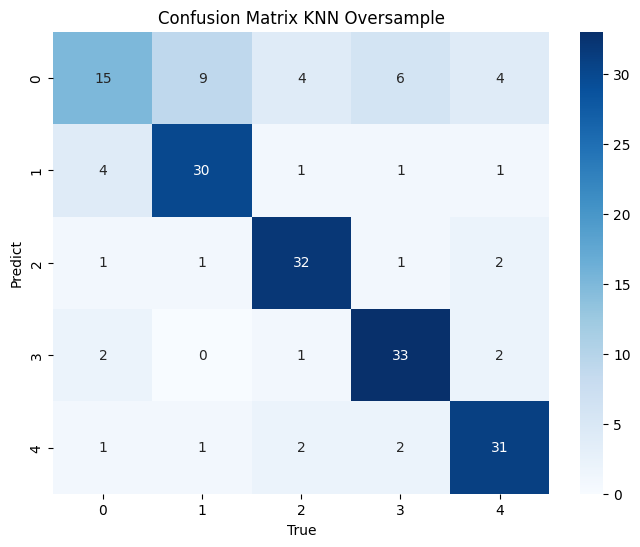

In [478]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### Random Forest

Selanjutnya, model yang dibangun akan menggunakan algoritma random forest dengan n_estimators = 100.

n_estimators digunakan untuk mengatur jumlah pohon keputusan yang akan dibangun.

In [479]:
# create a Random Forest classifier with 100 trees and a fixed random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Menampilkan hasil evaluasi dari algoritma RandomForest

In [480]:
# make predictions on the test set using the Random Forest model and store the predictions in y_pred_rf
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model : ")
# calculate accuracy
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy :", accuracy_rf_smote)
print("Classification Report : ")
print(classification_report(y_test, y_pred_rf))

Random Forest Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [481]:
# call function evaluation to display model performance
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.92, 'Precision Score': 0.922}


Menampilkan hasil Confusion Matrix dari RandomForest

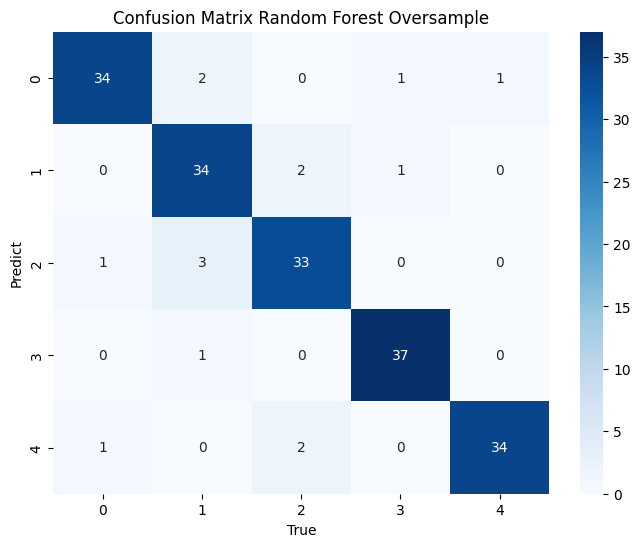

In [482]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest Oversample")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

#### XGBoost

Model selanjutnya yang akan dibangun adalah model dengan algoritma XGBoost yang menggunakan learning rate 0.1. Learning rate digunakan untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [483]:
# creates XGBoost model with a learning rate of 0.1, 100 trees (boosting rounds), and a fixed random state for reproducibility.
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
# train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Menampilkan hasil evaluasi dari algoritma XGBoost

In [484]:
# make predictions on the test set and store the predictions in y_pred_xgb
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Model : ")
# calculate accuracy
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy :", accuracy_xgb_smote)
print("Classification Report : ")
# generate classification report
print(classification_report(y_test, y_pred_xgb))

XGBoost Model : 
Accuracy : 0.904
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [485]:
# call function evaluation to display model performance
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 Score': 0.904, 'Precision Score': 0.906}


Menampilkan hasil Confusion Matrix dari XGBoost

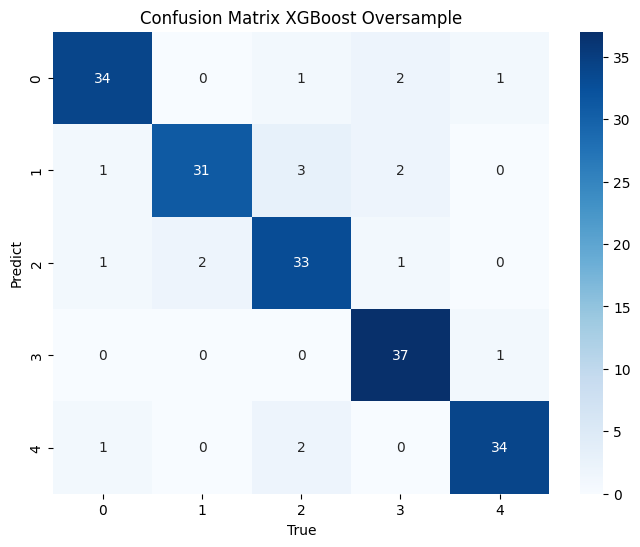

In [486]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversample + Normalisasi

Data yang dipakai pada bagian ini adalah data yang sudah dilakukan oversample dan normalisasi. Model yang dibuat pada bagian ini mirip dengan bagian oversample di atas, hanya saja data set yang digunakan berbeda.

Sama seperti sebelumnya, algoritma yang digunakan adalah KNN, Random Forest, dan XGBoost. Visualisasi akan dibuat sesuai hasil evaluasi pada masing-masing model.

Penjelasan code pada bagian ini sama dengan bagian sebelumnya karena yang berbeda hanya dataset.



#### KNN

In [487]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# create model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
# train model
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

Menampilkan hasil evaluasi dari KNN dengan normalisasi

In [488]:
# make predictions
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy :", accuracy_knn_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.861
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [489]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 Score': 0.861, 'Precision Score': 0.863}


Menampilkan hasil Confusion Matrix dari KNN dengan normalisasi

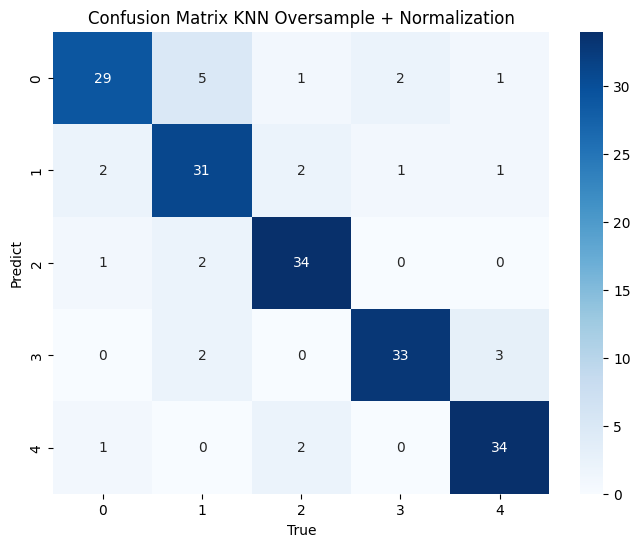

In [490]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample + Normalization')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### Random Forest

In [491]:
# create model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# train model
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

Menampilkan hasil evaluasi dari RandomForest dengan normalisasi

In [492]:
# make predictions
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("Random Forest Model : ")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy :", accuracy_rf_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [493]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.92, 'Precision Score': 0.922}


Menampilkan hasil Confusion Matrix dari RandomForest dengan normalisasi

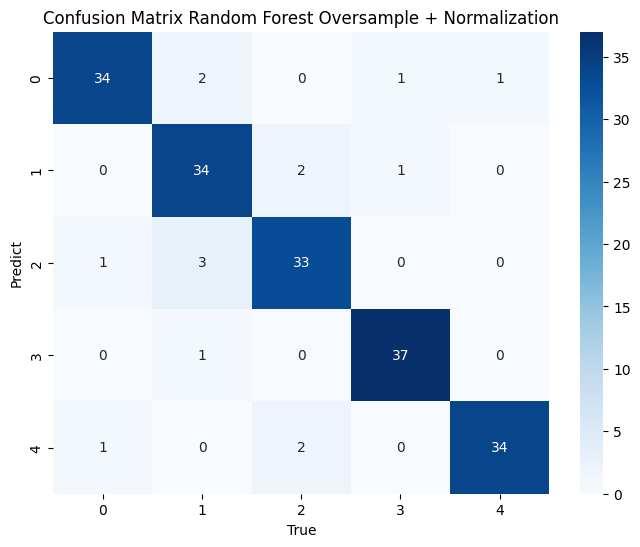

In [494]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest Oversample + Normalization")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### XGBoost

In [495]:
# create model
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
# train model
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Menampilkan hasil evaluasi dari XGBoost dengan normalisasi

In [496]:
# make predictions
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost Model
print("XGBoost Model : ")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy :", accuracy_xgb_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model : 
Accuracy : 0.904
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [497]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 Score': 0.904, 'Precision Score': 0.906}


Menampilkan hasil Confusion Matrix dari XGBoost dengan normalisasi

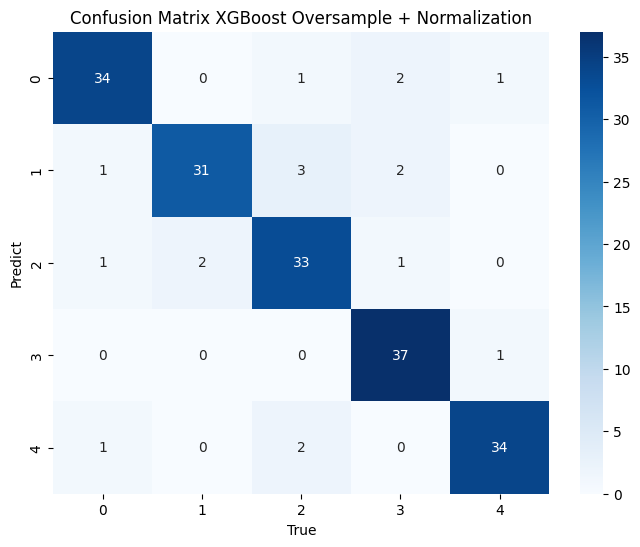

In [498]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample + Normalization')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Tuning + Normalization + Oversample

---



Pada tahap modelling yang terakhir ini, algoritma yang digunakan masih sama yaitu KNN, Random Forest, dan XGBoost. Namun, data yang digunakan pada bagian ini adalah data yang sudah dilakukan Tunning Parameter, Normalisasi, dan Oversample.

#### KNN

In [499]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
# import RandomizedSearchCV which is a class for hyperparameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunning tidak selalu sama karena bergantung pada algoritma yang digunakan

In [500]:
# create instance of KNN classifier
knn_model = KNeighborsClassifier()

# define hyperparameter grid to be searched (for random search)
param_grid = {
    "n_neighbors" : range(3,21),
    "metric" : ["euclidean", "manhattan", "chebyshev"],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree"],
    "leaf_size" : range(10,61)
}

# RandomizedSearchCV performs a randomized search over hyperparameter combinations
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5, random_state=42)
# train model
knn_model.fit(X_train_normal, y_train_normal)
# access the best hyperparameters found during the search
best_params = knn_model.best_params_
print(f"Best parameters : {best_params}")

Best parameters : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 49, 'algorithm': 'kd_tree'}


Menampilkan hasil evaluasi dari KNN dengan normalisasi dan tunning parameter

In [501]:
# make predictions
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy :", accuracy_knn_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [502]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.92, 'Precision Score': 0.923}


Menampilkan hasil Confusion Matrix dari KNN dengan normalisasi dan tunning parameter

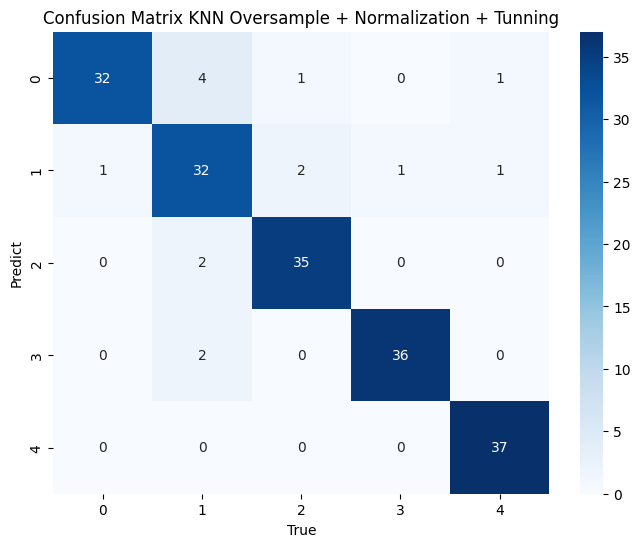

In [503]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### Random Forest

Melakukan tunning parameter dengan RandomizedSearchCV untuk memperoleh parameter terbaik

In [504]:
# create model random forest
rf_model = RandomForestClassifier()

# define parameter grid to be searched
param_grid = {
    "n_estimators" : [100, 200],
    "max_depth" : [10, 15],
    "min_samples_leaf" : [1, 2],
    "min_samples_split" : [2, 5],
    "max_features" : ["sqrt", "log2"],
    # "random_state" : [42, 100, 200]
}

# perform randomized search over hyperparameter combinations on model random forest
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# train model
rf_model.fit(X_train_normal, y_train_normal)

# get the best hyperparameter found during the search
best_params = rf_model.best_params_
print(f"Best parameters : {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


Menampilkan hasil evaluasi dari RandomForest dengan normalisasi dan tunning parameter

In [505]:
# make predictions
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest Model
print("Random Forest Model : ")
accuracy_rf_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy :", accuracy_rf_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model : 
Accuracy : 0.914
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.89      0.87        37
         2.0       0.89      0.89      0.89        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [506]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 Score': 0.915, 'Precision Score': 0.916}


Menampilkan hasil Confusion Matrix dari RandomForest dengan normalisasi dan tunning parameter

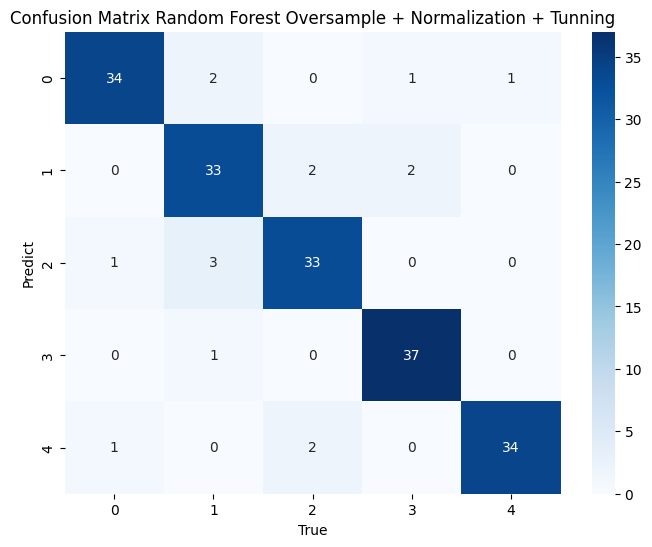

In [507]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Random Forest Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#### XGBoost

Melakukan tunning parameter dengan RandomizedSearchCV untuk memperoleh parameter terbaik

In [508]:
# create XGB model
xgb_model = XGBClassifier()

# define hyperparameter grid to be searched
param_grid = {
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.1],
    "n_estimators" : [100, 200],
    "gamma" : [0, 0.1],
    "colsample_bytree" : [0.7, 0.8]
}

# perform randomized search on XGB model
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# train model
xgb_model.fit(X_train_normal, y_train_normal)

# access best hyperparameter found during the search
best_params = xgb_model.best_params_
print(f"Best parameters : {best_params}")

Best parameters : {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}


Menampilkan hasil evaluasi dari XGBoost dengan normalisasi dan tunning parameter

In [509]:
# make predictions
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("XGBoost Model : ")
accuracy_xgb_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("accuracy :", accuracy_xgb_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model : 
accuracy : 0.866
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.86      0.84      0.85        37
         2.0       0.77      0.81      0.79        37
         3.0       0.90      0.92      0.91        38
         4.0       0.91      0.84      0.87        37

    accuracy                           0.87       187
   macro avg       0.87      0.87      0.87       187
weighted avg       0.87      0.87      0.87       187



In [510]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.866, 'recall': 0.866, 'F1 Score': 0.867, 'Precision Score': 0.868}


Menampilkan hasil Confusion Matrix dari XGBoost dengan normalisasi dan tunning parameter

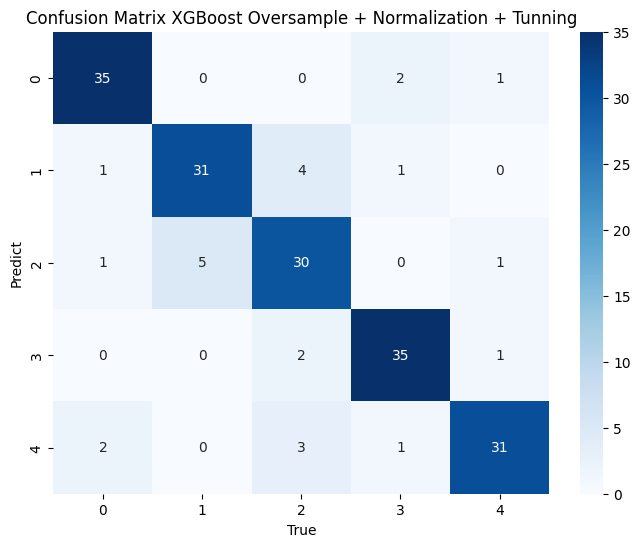

In [511]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 8) Evaluasi

Evaluasi data dilakukan untuk membandingkan antar algoritma. Hal ini bertujuan untuk mengetahui jenis model algoritma mana yang menghasilkan hasil akurasi terbaik.

Perbandingan akurasi tiga model menggunakan dataset yang sudah dilakukan oversample

In [512]:
import matplotlib.pyplot as plt

# create dataframe for model comparison
model_comp1 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]
})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


Membuat bar plot untuk melihat perbandingan antar algoritma

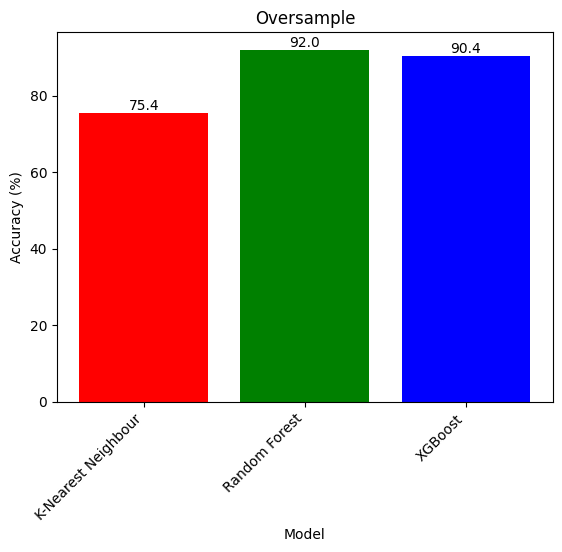

In [513]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') #untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars :
  yval= bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

Perbandingan akurasi tiga model menggunakan dataset yang sudah dilakukan oversample dan normalisasi

In [514]:
model_comp2 = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal*100]
})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


Membuat bar plot untuk melihat perbandingan antar algoritma

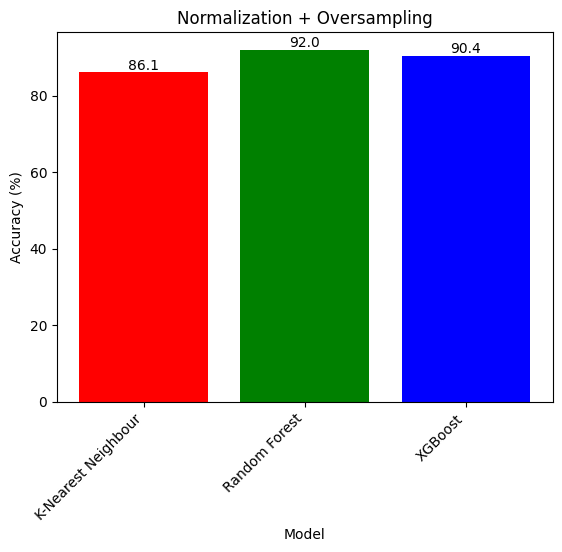

In [515]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.show()

Perbandingan akurasi tiga model menggunakan dataset yang sudah dilakukan oversample, normalisasi, dan tunning parameter

In [516]:
model_comp3 = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote_normal_tun *100, accuracy_rf_smote_normal_tun*100, accuracy_xgb_smote_normal_tun*100]
})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,91.4
2,XGBoost,86.6


Membuat bar plot untuk melihat perbandingan antar algoritma

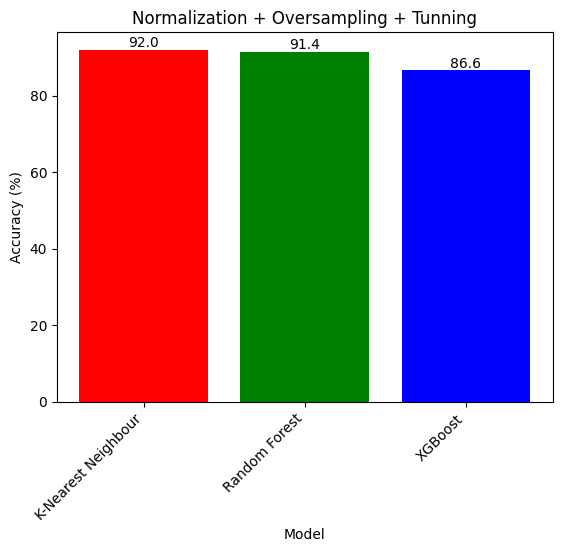

In [517]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars :
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Perbandingan model terbaik dari masing - masing algoritma. Contohnya pada kasus ini, KNN memiliki nilai akurasi terbaik saat menggunakan dataset yang sudah dilakukan oversample, normalisasi, dan tuning. Sedangkan random forest memiliki hasil akurasi terbaik saat menggunakan dataset yang sudah dilakukan oversample dan normalisasi.

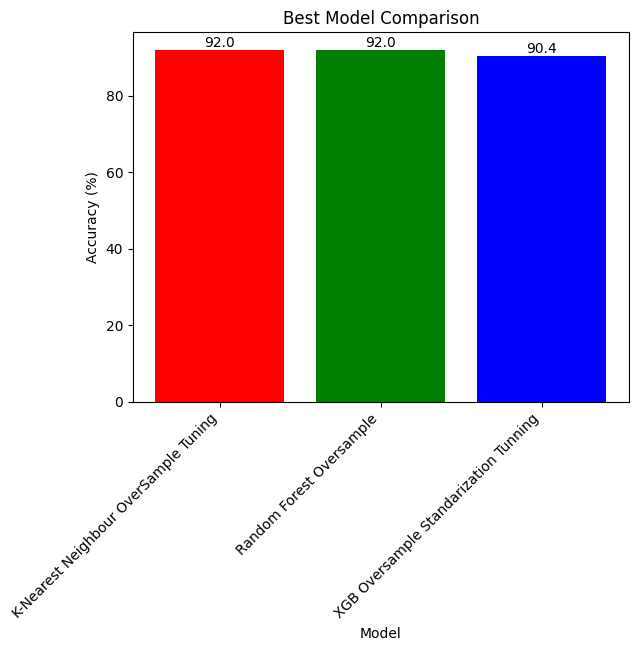

In [518]:
# Data Frame
model_compBest = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour OverSample Tuning', 'Random Forest Oversample', 'XGB Oversample Standarization Tunning'],
    'Accuracy' : [accuracy_knn_smote_normal_tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## 9) Streamlit

On process

## 10) Kesimpulan